# TCCA Program

**Features**
<br>1) This program computes dice overlap between images in MNI152 space.

<br>2) The dice overlap is computed between the input and a choice of five atlases namely **Harvard-Oxford atlas, Juelich atlas, Von Economo atlas, Glasser atlas and Brodmann atlas.**

<br>3) If the shape of the input is not same as the shape of the atlas image, the input image is resampled in accordance with the atlas image using Nilearn.

<br>4) The dice overlap is computed between the input and all the regions of the chosen atlas.

The following program is an illustration of TCCA toolbox. The tcca_all_atlases module contains of tcca function which is called below. This function takes an input image and compares the overlap between that input image and each region of all the available atlases.

In [1]:
#Import necessary Python Packages
import os
import re
import nibabel as nib
import glob
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import tcca_all_atlases

In [2]:
#Sort the numbers into ascending order of value
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
#Example to check the working of the module. A random region from one of the atlases is taken as input
input_dir = '/Users/shreyasindurkar/Desktop/Data/Atlases/Harvard_Oxford_Atlas/Left/'
os.chdir(input_dir)
input_files=sorted(glob.glob("*.nii.gz"), key = numericalSort)
filename=input_files[10]
print(filename)
input_img=os.path.join(input_dir + str(filename))
#input_image = nib.load(input_img)

11.nii.gz


In [ ]:
#To determine the time taken for the execution of the function
import time

start_time = time.time()

#Assign variables and store the outputs of the function
dice_dictionary, output_text = tcca_all_atlases.tcca(target_img,'left')

end_time = time.time()

total_time = end_time - start_time

print(f"Total execution time: {total_time} seconds")

#Sorting the dictionary in the ascending order of keys
sorted_keys = sorted(dice_dictionary.keys())
sorted_values = [dice_dictionary[key] for key in sorted_keys]

In [5]:
print(output_text)

['Maximum Overlap of 0.02831960394717656 at ctx-lh-BA37 in Brodmann_Atlas', 'Maximum Overlap of 0.02836739892313503 at ctx-lh-K37 in Kleist_Atlas', 'Maximum Overlap of 0.1109736431732049 at ctx-lh-temporal in Campbell_Atlas', 'Maximum Overlap of 0.0390764400676543 at Area_TG_dorsal in Glasser_Atlas', 'Maximum Overlap of 0.002284843869002285 at S Acoustic radiation in Juelich_hist_Atlas', 'Maximum Overlap of 0.07108369401618676 at ctx-lh-CT3_par in EconomoCT_Atlas', 'Maximum Overlap of 0.03980897843316168 at ctx-lh-F44 in Flechsig_Atlas', 'Maximum Overlap of 0.03361962887788459 at ctx-lh-tempmed in Smith_Atlas', 'Maximum Overlap of 1.0 at Middle Temporal G A D in Harvard_Oxford_Atlas']


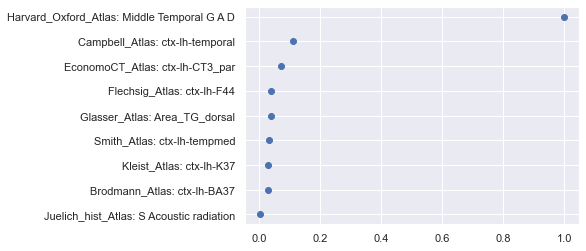

In [6]:
#Sorting the dictionary in the ascending order of keys
sorted_keys = sorted(dice_dictionary.keys())
sorted_values = [dice_dictionary[key] for key in sorted_keys]
plt.scatter(sorted_keys, sorted_values)
plt.show()